In [76]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder #
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')


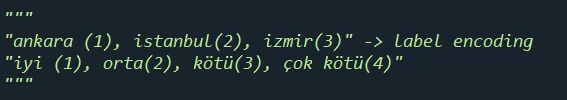

In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv')
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,Emergency,Home w/ Home Health Services,2021,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),OTR004,ISOLATION PROCEDURES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,NVS005,MULTIPLE SCLEROSIS,NaN,NaN,43,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,2021,PRG016,PREVIOUS C-SECTION,PGN003,CESAREAN SECTION,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,5,Emergency,Home or Self Care,2021,GEN004,URINARY TRACT INFECTIONS,ADM017,ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC...,463,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,2021,NVS008,PARALYSIS (OTHER THAN CEREBRAL PALSY),CNS002,LUMBAR PUNCTURE,58,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,2089497.0,4.990270e+06,2.234939e+06,101000.0,2951001.0,5902001.0,7002020.0,7004010.0
Permanent Facility Id,2090946.0,1.033841e+03,7.094093e+02,1.0,528.0,1045.0,1453.0,10355.0
Discharge Year,2101588.0,2.021000e+03,0.000000e+00,2021.0,2021.0,2021.0,2021.0,2021.0
APR DRG Code,2101588.0,4.141057e+02,2.442334e+02,1.0,194.0,383.0,640.0,956.0
APR MDC Code,2101588.0,1.028546e+01,5.961765e+00,0.0,5.0,9.0,15.0,25.0
APR Severity of Illness Code,2101588.0,2.122646e+00,9.556966e-01,0.0,1.0,2.0,3.0,4.0


In [5]:
los = df['Length of Stay']
los

0          27
1           4
2           2
3           5
4           3
           ..
2101583     1
2101584    13
2101585     7
2101586     2
2101587     7
Name: Length of Stay, Length: 2101588, dtype: object

In [15]:
df['Length of Stay'] = df['Length of Stay'].replace('120 +', 120)
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

In [16]:
df.isna().sum()

Hospital Service Area                    10590
Hospital County                          10590
Operating Certificate Number             12023
Permanent Facility Id                    10590
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      43930
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                       1614
CCSR Diagnosis Description                1614
CCSR Procedure Code                     566234
CCSR Procedure Description              566234
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [17]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f'Number of unique values in {column}: {unique_values}')


Number of unique values in Hospital Service Area: 9
Number of unique values in Hospital County: 58
Number of unique values in Operating Certificate Number: 169
Number of unique values in Permanent Facility Id: 206
Number of unique values in Facility Name: 205
Number of unique values in Age Group: 5
Number of unique values in Zip Code - 3 digits: 51
Number of unique values in Gender: 3
Number of unique values in Race: 4
Number of unique values in Ethnicity: 4
Number of unique values in Length of Stay: 120
Number of unique values in Type of Admission: 6
Number of unique values in Patient Disposition: 18
Number of unique values in Discharge Year: 1
Number of unique values in CCSR Diagnosis Code: 478
Number of unique values in CCSR Diagnosis Description: 478
Number of unique values in CCSR Procedure Code: 321
Number of unique values in CCSR Procedure Description: 321
Number of unique values in APR DRG Code: 334
Number of unique values in APR DRG Description: 334
Number of unique values in 

In [18]:
df['Patient Disposition'].unique()

array(['Home w/ Home Health Services', 'Home or Self Care',
       'Left Against Medical Advice', 'Short-term Hospital',
       'Skilled Nursing Home', 'Hospice - Medical Facility',
       'Court/Law Enforcement', 'Another Type Not Listed',
       'Inpatient Rehabilitation Facility',
       'Medicaid Cert Nursing Facility',
       'Psychiatric Hospital or Unit of Hosp', 'Hospice - Home',
       'Medicare Cert Long Term Care Hospital',
       'Facility w/ Custodial/Supportive Care',
       'Critical Access Hospital', 'Federal Health Care Facility',
       'Hosp Basd Medicare Approved Swing Bed',
       "Cancer Center or Children's Hospital"], dtype=object)

In [19]:
df = df[df['Patient Disposition'] != 'Expired']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037764 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       int64  
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description           

In [21]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Medicare'),
  Text(1, 0, 'Private Health Insurance'),
  Text(2, 0, 'Medicaid'),
  Text(3, 0, 'Blue Cross/Blue Shield'),
  Text(4, 0, 'Self-Pay'),
  Text(5, 0, 'Miscellaneous/Other'),
  Text(6, 0, 'Managed Care, Unspecified'),
  Text(7, 0, 'Department of Corrections'),
  Text(8, 0, 'Federal/State/Local/VA')])

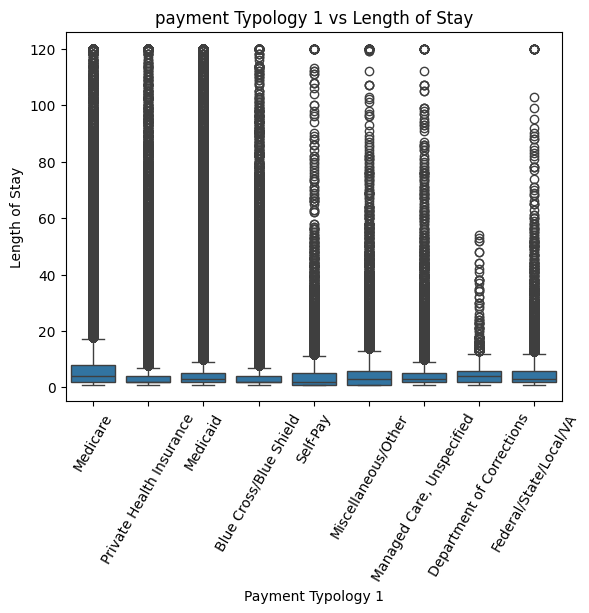

In [23]:
# EDA

sns.boxplot(x = 'Payment Typology 1', y = 'Length of Stay', data=df)
plt.title('payment Typology 1 vs Length of Stay')
plt.xticks(rotation = 60)


Text(0.5, 1.0, 'Medicare Patients for Age Group')

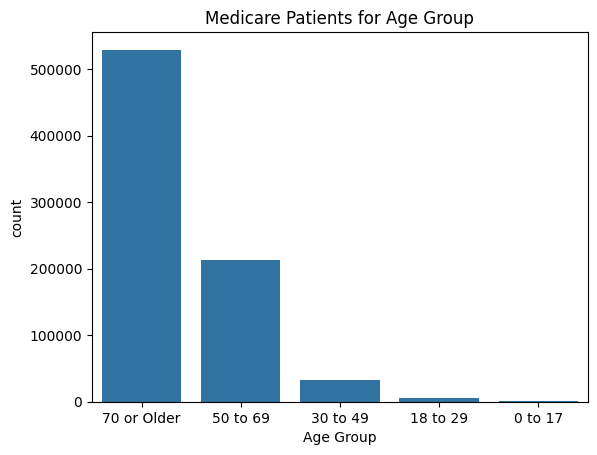

In [ ]:
sns.countplot(x = 'Age Group', data = df[df['Payment Typology 1'] =='Medicare'])
plt.title('Medicare Patients for Age Group')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Emergency'),
  Text(1, 0, 'Newborn'),
  Text(2, 0, 'Elective'),
  Text(3, 0, 'Urgent'),
  Text(4, 0, 'Trauma'),
  Text(5, 0, 'Not Available')])

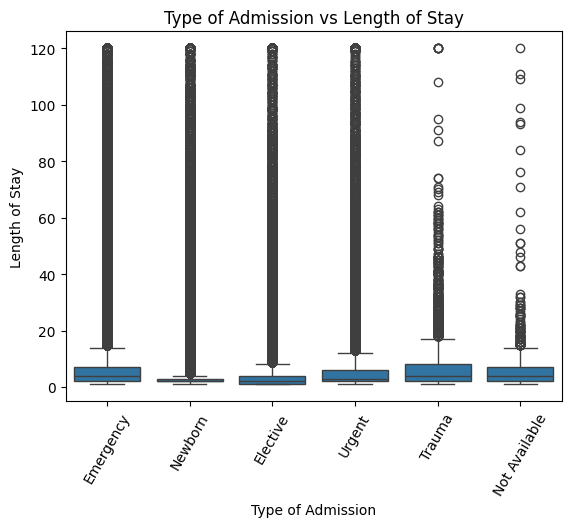

In [ ]:
sns.boxplot(x = 'Type of Admission', y = 'Length of Stay', data=df)
plt.title('Type of Admission vs Length of Stay')
plt.xticks(rotation = 60)

[(0.0, 25.0)]

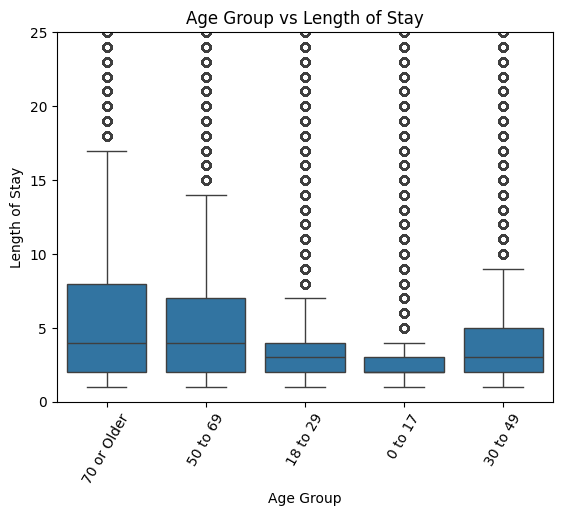

In [30]:
f, ax = plt.subplots()
sns.boxplot(x = 'Age Group', y = 'Length of Stay', data=df)
plt.title('Age Group vs Length of Stay')
plt.xticks(rotation = 60)
ax.set(ylim = (0,25))

In [31]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [34]:
# Feature Encoding - Selection: Label Encoding

df = df.drop(['Hospital Service Area', 'Hospital County', 'Operating Certificate Number',
              'Facility Name', 'Zip Code - 3 digits', 'Discharge Year',
              'CCSR Diagnosis Description',  'CCSR Procedure Description','APR DRG Description',
              'APR MDC Description', 'APR Severity of Illness Description', 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight', 
              'Total Charges', 'Total Costs'], axis=1)

In [37]:
age_group_index = {'0 to 17':1, '18 to 29':2, '30 to 49':3, '50 to 69':4, '70 or Older': 5}
gender_index = {'U':0, 'F':1, 'M':2}
risk_and_severity_index = {np.nan:0, 'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}

In [38]:
df['Age Group'] = df['Age Group'].apply(lambda x: age_group_index[x])
df['Gender'] = df['Gender'].apply(lambda x: gender_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: risk_and_severity_index[x])

In [39]:
df.head()

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
0,1169.0,5,2,Other Race,Spanish/Hispanic,27,Emergency,Home w/ Home Health Services,INF012,OTR004,137,4,3,4,Medical,Medicare,Y
1,1169.0,4,1,White,Not Span/Hispanic,4,Emergency,Home or Self Care,NVS005,NaN,43,1,2,1,Medical,Private Health Insurance,Y
2,1168.0,2,1,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,PRG016,PGN003,540,14,1,1,Surgical,Medicaid,N
3,3058.0,5,2,Other Race,Spanish/Hispanic,5,Emergency,Home or Self Care,GEN004,ADM017,463,11,3,3,Medical,Medicare,Y
4,1169.0,4,1,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,NVS008,CNS002,58,1,2,1,Medical,Medicare,Y


In [40]:
df.columns

Index(['Permanent Facility Id', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR DRG Code',
       'APR MDC Code', 'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator'],
      dtype='object')

In [42]:
encoder = OrdinalEncoder()
df['Race'] = encoder.fit_transform(np.asarray(df['Race']).reshape(-1,1))
df['Ethnicity'] = encoder.fit_transform(np.asarray(df['Ethnicity']).reshape(-1,1))
df['Type of Admission'] = encoder.fit_transform(np.asarray(df['Type of Admission']).reshape(-1,1))
df['CCSR Diagnosis Code'] = encoder.fit_transform(np.asarray(df['CCSR Diagnosis Code']).reshape(-1,1))
df['EthnicCCSR Procedure Codeity'] = encoder.fit_transform(np.asarray(df['CCSR Procedure Code']).reshape(-1,1))
df['APR Medical Surgical Description'] = encoder.fit_transform(np.asarray(df['APR Medical Surgical Description']).reshape(-1,1))
df['Payment Typology 1'] = encoder.fit_transform(np.asarray(df['Payment Typology 1']).reshape(-1,1))
df['Emergency Department Indicator'] = encoder.fit_transform(np.asarray(df['Emergency Department Indicator']).reshape(-1,1))


In [43]:
df.head()

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,EthnicCCSR Procedure Codeity
0,1169.0,5,2,2.0,2.0,27,1.0,Home w/ Home Health Services,154.0,OTR004,137,4,3,4,0.0,5.0,1.0,253.0
1,1169.0,4,1,3.0,1.0,4,1.0,Home or Self Care,377.0,NaN,43,1,2,1,0.0,7.0,1.0,NaN
2,1168.0,2,1,2.0,2.0,2,1.0,Home or Self Care,423.0,PGN003,540,14,1,1,2.0,4.0,0.0,257.0
3,3058.0,5,2,2.0,2.0,5,1.0,Home or Self Care,121.0,ADM017,463,11,3,3,0.0,5.0,1.0,16.0
4,1169.0,4,1,0.0,1.0,3,1.0,Home or Self Care,380.0,CNS002,58,1,2,1,0.0,5.0,1.0,52.0


In [44]:
df.isna().sum()

Permanent Facility Id                10590
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
CCSR Diagnosis Code                   1614
CCSR Procedure Code                 566234
APR DRG Code                             0
APR MDC Code                             0
APR Severity of Illness Code             0
APR Risk of Mortality                    0
APR Medical Surgical Description         0
Payment Typology 1                       0
Emergency Department Indicator           0
EthnicCCSR Procedure Codeity        566234
dtype: int64

In [45]:
df = df.drop('CCSR Procedure Code', axis=1)
df = df.dropna(subset=['Permanent Facility Id', 'CCSR Diagnosis Code'])

In [46]:
df.isna().sum()

Permanent Facility Id                    0
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
CCSR Diagnosis Code                      0
APR DRG Code                             0
APR MDC Code                             0
APR Severity of Illness Code             0
APR Risk of Mortality                    0
APR Medical Surgical Description         0
Payment Typology 1                       0
Emergency Department Indicator           0
EthnicCCSR Procedure Codeity        561400
dtype: int64

In [47]:
df = df.drop('EthnicCCSR Procedure Codeity', axis=1)

In [48]:
df.isna().sum()

Permanent Facility Id               0
Age Group                           0
Gender                              0
Race                                0
Ethnicity                           0
Length of Stay                      0
Type of Admission                   0
Patient Disposition                 0
CCSR Diagnosis Code                 0
APR DRG Code                        0
APR MDC Code                        0
APR Severity of Illness Code        0
APR Risk of Mortality               0
APR Medical Surgical Description    0
Payment Typology 1                  0
Emergency Department Indicator      0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025564 entries, 0 to 2101587
Data columns (total 16 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Permanent Facility Id             float64
 1   Age Group                         int64  
 2   Gender                            int64  
 3   Race                              float64
 4   Ethnicity                         float64
 5   Length of Stay                    int64  
 6   Type of Admission                 float64
 7   Patient Disposition               object 
 8   CCSR Diagnosis Code               float64
 9   APR DRG Code                      int64  
 10  APR MDC Code                      int64  
 11  APR Severity of Illness Code      int64  
 12  APR Risk of Mortality             int64  
 13  APR Medical Surgical Description  float64
 14  Payment Typology 1                float64
 15  Emergency Department Indicator    float64
dtypes: float64(8), int64(7), object(1)
memory

In [59]:
df = df.drop('Patient Disposition', axis=1)

In [60]:
# Train Test Split
X = df.drop(['Length of Stay'], axis=1)
y = df['Length of Stay']

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [64]:
#Regression : Train & Test

dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

#Predict (To test for overfitting, we predict using the X_train and X_test data.)
train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

print('RMS: Train', np.sqrt(mean_squared_error(y_train, train_prediction)))
print('RMS: Test',  np.sqrt(mean_squared_error(y_test, test_prediction)))

RMS: Train 2.84783327422551
RMS: Test 7.982937161507531


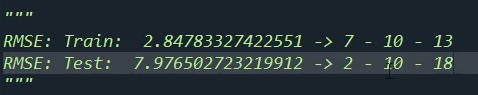
* The model seems to have overfitted the training dataset, resulting in an error of approximately 8 when predicting the test dataset.

In [ ]:
#After max_depth = 10

dtree = DecisionTreeRegressor(max_depth=10)

dtree.fit(X_train, y_train)

#Predict (To test for overfitting, we predict using the X_train and X_test data.)
train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

print('RMS: Train', np.sqrt(mean_squared_error(y_train, train_prediction)))
print('RMS: Test',  np.sqrt(mean_squared_error(y_test, test_prediction)))

RMS: Train 6.088278470926022
RMS: Test 6.2427980251429736


In [67]:
#Solve classification problem: train & test
bins = [0, 5, 10, 20, 30, 50, 120]
labels = [5, 10, 20, 30, 50, 120]

df['Los_bin'] = pd.cut(x=df['Length of Stay'], bins=bins)

In [68]:
df.head(10)

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCSR Diagnosis Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Los_bin
0,1169.0,5,2,2.0,2.0,27,1.0,154.0,137,4,3,4,0.0,5.0,1.0,"(20, 30]"
1,1169.0,4,1,3.0,1.0,4,1.0,377.0,43,1,2,1,0.0,7.0,1.0,"(0, 5]"
2,1168.0,2,1,2.0,2.0,2,1.0,423.0,540,14,1,1,2.0,4.0,0.0,"(0, 5]"
3,3058.0,5,2,2.0,2.0,5,1.0,121.0,463,11,3,3,0.0,5.0,1.0,"(0, 5]"
4,1169.0,4,1,0.0,1.0,3,1.0,380.0,58,1,2,1,0.0,5.0,1.0,"(0, 5]"
5,3058.0,4,2,2.0,2.0,6,1.0,190.0,813,21,3,2,0.0,7.0,1.0,"(5, 10]"
6,1169.0,4,1,0.0,1.0,1,1.0,162.0,55,1,1,1,0.0,5.0,1.0,"(0, 5]"
7,3058.0,1,2,2.0,1.0,3,2.0,395.0,640,15,2,1,0.0,4.0,0.0,"(0, 5]"
8,1169.0,4,2,2.0,2.0,21,1.0,190.0,721,18,2,2,0.0,5.0,1.0,"(20, 30]"
9,1168.0,5,1,2.0,2.0,2,1.0,69.0,249,6,3,2,0.0,5.0,1.0,"(0, 5]"


In [69]:
df['Los_label'] = pd.cut(x=df['Length of Stay'], bins=bins, labels=labels)

In [70]:
df.head(10)

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCSR Diagnosis Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Los_bin,Los_label
0,1169.0,5,2,2.0,2.0,27,1.0,154.0,137,4,3,4,0.0,5.0,1.0,"(20, 30]",30
1,1169.0,4,1,3.0,1.0,4,1.0,377.0,43,1,2,1,0.0,7.0,1.0,"(0, 5]",5
2,1168.0,2,1,2.0,2.0,2,1.0,423.0,540,14,1,1,2.0,4.0,0.0,"(0, 5]",5
3,3058.0,5,2,2.0,2.0,5,1.0,121.0,463,11,3,3,0.0,5.0,1.0,"(0, 5]",5
4,1169.0,4,1,0.0,1.0,3,1.0,380.0,58,1,2,1,0.0,5.0,1.0,"(0, 5]",5
5,3058.0,4,2,2.0,2.0,6,1.0,190.0,813,21,3,2,0.0,7.0,1.0,"(5, 10]",10
6,1169.0,4,1,0.0,1.0,1,1.0,162.0,55,1,1,1,0.0,5.0,1.0,"(0, 5]",5
7,3058.0,1,2,2.0,1.0,3,2.0,395.0,640,15,2,1,0.0,4.0,0.0,"(0, 5]",5
8,1169.0,4,2,2.0,2.0,21,1.0,190.0,721,18,2,2,0.0,5.0,1.0,"(20, 30]",30
9,1168.0,5,1,2.0,2.0,2,1.0,69.0,249,6,3,2,0.0,5.0,1.0,"(0, 5]",5


In [72]:
df['Los_bin'] = df['Los_bin'].apply(lambda x: str(x).replace(',', '-'))
df['Los_bin'] = df['Los_bin'].apply(lambda x: str(x).replace('120', '120+'))

<Axes: xlabel='Los_bin', ylabel='count'>

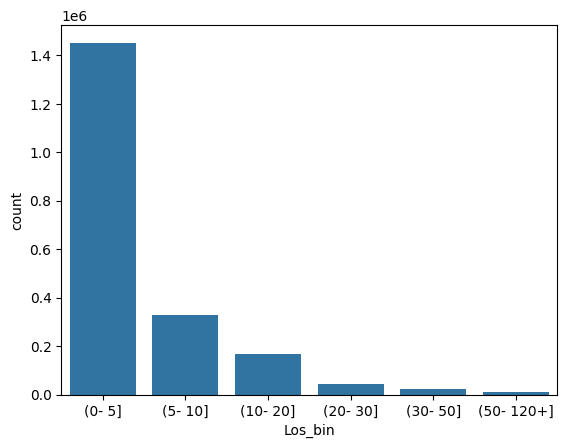

In [73]:
f, ax = plt.subplots()
sns.countplot(x='Los_bin', data=df)

In [74]:
# Train Test Split
new_X = df.drop(['Length of Stay', 'Los_bin', 'Los_label'], axis=1)
new_y = df['Los_label']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [79]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_prediction))
print('Test Accuracy: ', accuracy_score(y_test, test_prediction))
print('classification report:', classification_report(y_test, test_prediction))

Train Accuracy:  0.9244704097809807
Test Accuracy:  0.6851915391508049
classification report:               precision    recall  f1-score   support

           5       0.83      0.86      0.84    290828
          10       0.30      0.28      0.29     65845
          20       0.27      0.24      0.25     33085
          30       0.16      0.13      0.14      8771
          50       0.15      0.12      0.14      4363
         120       0.29      0.23      0.25      2221

    accuracy                           0.69    405113
   macro avg       0.33      0.31      0.32    405113
weighted avg       0.67      0.69      0.68    405113



## OVERFITTING !!!

In [80]:
#After overfitting
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train, y_train)

train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_prediction))
print('Test Accuracy: ', accuracy_score(y_test, test_prediction))
print('classification report:', classification_report(y_test, test_prediction))

Train Accuracy:  0.741820024178454
Test Accuracy:  0.7410821178288527
classification report:               precision    recall  f1-score   support

           5       0.80      0.96      0.87    290828
          10       0.36      0.18      0.24     65845
          20       0.37      0.23      0.28     33085
          30       0.52      0.05      0.09      8771
          50       0.35      0.06      0.10      4363
         120       0.55      0.27      0.36      2221

    accuracy                           0.74    405113
   macro avg       0.49      0.29      0.33    405113
weighted avg       0.68      0.74      0.69    405113

